In [147]:
import pandas as pd
import pickle
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from math import pi, ceil
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

df_songs=pd.read_csv("database.csv")

df_songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name
0,0.782,0.972,5,-7.542,0,0.1480,0.02550,0.000013,0.3690,0.557,133.967,audio_features,1YFTLSuSQ0odUosJIVTvOC,spotify:track:1YFTLSuSQ0odUosJIVTvOC,https://api.spotify.com/v1/tracks/1YFTLSuSQ0od...,https://api.spotify.com/v1/audio-analysis/1YFT...,326839,4,Ishq Kaminaa
1,0.696,0.888,0,-2.285,0,0.0336,0.05920,0.000185,0.1310,0.676,120.976,audio_features,7pCE1BHlNVbvIuqUEOGAj5,spotify:track:7pCE1BHlNVbvIuqUEOGAj5,https://api.spotify.com/v1/tracks/7pCE1BHlNVbv...,https://api.spotify.com/v1/audio-analysis/7pCE...,214067,4,Bhool Ja
2,0.621,0.704,7,-5.293,0,0.0236,0.10100,0.000000,0.1850,0.366,99.942,audio_features,4kO9vFarqUPNwlgFnVNgVh,spotify:track:4kO9vFarqUPNwlgFnVNgVh,https://api.spotify.com/v1/tracks/4kO9vFarqUPN...,https://api.spotify.com/v1/audio-analysis/4kO9...,291240,4,Tanha Dil
3,0.830,0.770,9,-4.135,0,0.1120,0.48300,0.000001,0.1270,0.927,99.990,audio_features,5VG9YmTLrTuhOlhWYDdI8v,spotify:track:5VG9YmTLrTuhOlhWYDdI8v,https://api.spotify.com/v1/tracks/5VG9YmTLrTuh...,https://api.spotify.com/v1/audio-analysis/5VG9...,216453,4,Sexy Mama
4,0.758,0.918,7,-2.487,1,0.1080,0.00085,0.000154,0.0619,0.721,98.071,audio_features,6dWQ9E5mFjQZA7ujh3wd2Z,spotify:track:6dWQ9E5mFjQZA7ujh3wd2Z,https://api.spotify.com/v1/tracks/6dWQ9E5mFjQZ...,https://api.spotify.com/v1/audio-analysis/6dWQ...,93760,4,Ari Ari (Part 1)


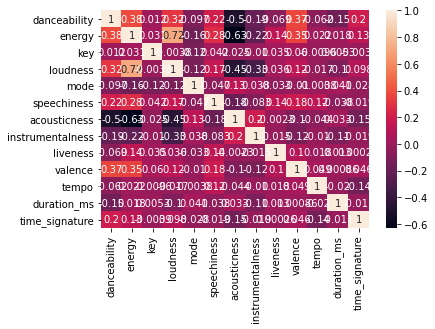

In [2]:
ax = sns.heatmap(df_songs.corr(), annot=True)
plt.show()

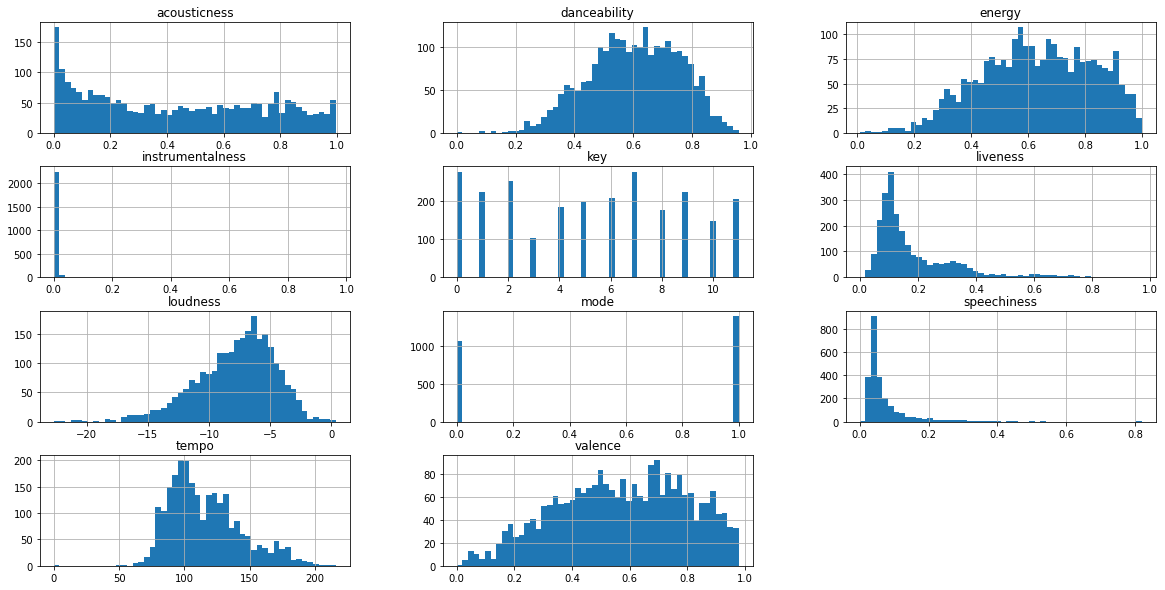

In [3]:
df_songs[[ 'acousticness', 'danceability', 'energy', 
           'instrumentalness', 'key','liveness','loudness', 'mode', 'speechiness',
           'tempo', 'valence']].hist(bins=50, figsize=(20,10))
plt.show()

In [4]:
columns_to_cluster = ['acousticness', 'danceability', 'energy', 
                      'instrumentalness', 'liveness','valence', 'tempo','speechiness', 'loudness']

In [148]:
ss = StandardScaler()

songs_scaled = ss.fit_transform(df_songs[columns_to_cluster])

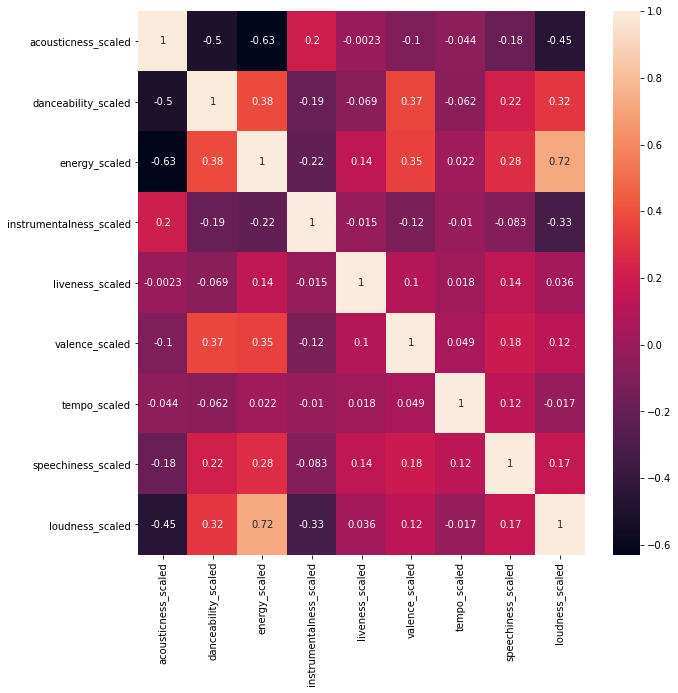

In [6]:
columns_to_cluster_scaled = ['acousticness_scaled', 'danceability_scaled', 
                             'energy_scaled', 'instrumentalness_scaled', 'liveness_scaled'
                             , 'valence_scaled', 'tempo_scaled','speechiness_scaled', 'loudness_scaled']

df_songs_scaled = pd.DataFrame(songs_scaled, columns=columns_to_cluster_scaled)
plt.figure(figsize = (10,10))
ax = sns.heatmap(df_songs_scaled.corr(), annot=True)
plt.show()

In [7]:
n_clusters = range(2,21)
ssd = []
sc = []

for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(songs_scaled)
    preds = km.predict(songs_scaled) 
    centers = km.cluster_centers_ 
    ssd.append(km.inertia_) 
    score = silhouette_score(songs_scaled, preds, metric='euclidean')
    sc.append(score)
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))

Number of Clusters = 2, Silhouette Score = 0.2107833177215986
Number of Clusters = 3, Silhouette Score = 0.22177024460494837
Number of Clusters = 4, Silhouette Score = 0.2116367676048247
Number of Clusters = 5, Silhouette Score = 0.18149604629508034
Number of Clusters = 6, Silhouette Score = 0.17672548566796958
Number of Clusters = 7, Silhouette Score = 0.1627239108096963
Number of Clusters = 8, Silhouette Score = 0.15348361662832402
Number of Clusters = 9, Silhouette Score = 0.1554113191701645
Number of Clusters = 10, Silhouette Score = 0.15666930836193999
Number of Clusters = 11, Silhouette Score = 0.16173936322649124
Number of Clusters = 12, Silhouette Score = 0.14879278635762389
Number of Clusters = 13, Silhouette Score = 0.146766533254769
Number of Clusters = 14, Silhouette Score = 0.14491280460654515
Number of Clusters = 15, Silhouette Score = 0.14664359198058805
Number of Clusters = 16, Silhouette Score = 0.14085169514922835
Number of Clusters = 17, Silhouette Score = 0.14952775

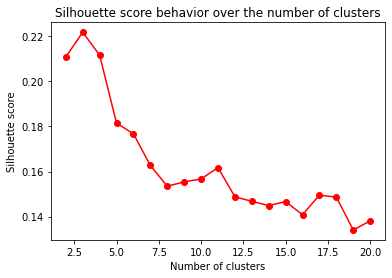

In [8]:
plt.plot(n_clusters, sc, marker='.', markersize=12, color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score behavior over the number of clusters')
plt.show()

In [9]:
for n, s in zip(n_clusters, ssd):
    print('Number of Clusters = {}, Sum of Squared Distances = {}'.format(n, s))

Number of Clusters = 2, Sum of Squared Distances = 17355.61773761584
Number of Clusters = 3, Sum of Squared Distances = 15117.714772535393
Number of Clusters = 4, Sum of Squared Distances = 13759.226979477362
Number of Clusters = 5, Sum of Squared Distances = 12659.797133212527
Number of Clusters = 6, Sum of Squared Distances = 11778.14351709487
Number of Clusters = 7, Sum of Squared Distances = 10946.140437800334
Number of Clusters = 8, Sum of Squared Distances = 10351.137237786363
Number of Clusters = 9, Sum of Squared Distances = 9925.88278834495
Number of Clusters = 10, Sum of Squared Distances = 9557.423745442697
Number of Clusters = 11, Sum of Squared Distances = 9229.579487972062
Number of Clusters = 12, Sum of Squared Distances = 8928.16811951251
Number of Clusters = 13, Sum of Squared Distances = 8676.532413465264
Number of Clusters = 14, Sum of Squared Distances = 8460.492727839674
Number of Clusters = 15, Sum of Squared Distances = 8216.306942976535
Number of Clusters = 16, 

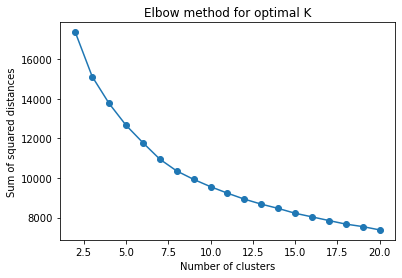

In [10]:
plt.plot(n_clusters, ssd, marker='.', markersize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()

In [12]:
from kneed import KneeLocator
kl = KneeLocator(range(2, 21), ssd, curve="convex", direction="decreasing")
kl.elbow

8

In [149]:
k=8

model = KMeans(n_clusters=k, random_state=42).fit(songs_scaled)
pred = model.predict(songs_scaled)
print('10 first clusters: ', model.labels_[:10])

10 first clusters:  [4 4 1 4 4 4 4 4 1 3]


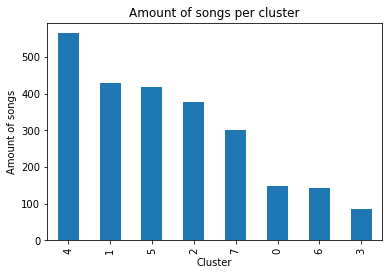

In [150]:
df_songs_scaled['cluster'] = model.labels_

df_songs_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs per cluster')
plt.show()

In [151]:
display(df_songs_scaled['cluster'].value_counts())
minor_cluster = df_songs_scaled['cluster'].value_counts().tail(1)
print("Amount of songs in the smallest cluster: ", int(minor_cluster.values))

4    565
1    429
5    419
2    377
7    302
0    148
6    142
3     86
Name: cluster, dtype: int64

Amount of songs in the smallest cluster:  86


In [153]:
df_songs_joined = pd.concat([df_songs,df_songs_scaled], axis=1).set_index('cluster')


for cluster in range(k):
    display(df_songs_joined.loc[cluster, ['name']].sample(frac=1).head(10))

,name
cluster,
0,Mehndi Laga Ke Rakhna
0,Ik Vaari Aa
0,Dil To Pagal Hai
0,Garaj Baras
0,Abhi Toh Party Shuru Hui Hai
0,Foto
0,Chand Sitare
0,"Rishte Naate - From ""De Dana Dan"""
0,Beqarar Karke Hamen Yun Na Jaiye


,name
cluster,
1,"Odhani (From ""Made in China"")"
1,Khabar Nahi
1,Bol Na Halke Halke
1,O Oh Jaane Jana
1,Dooriyan
1,Tu Hi Ah
1,"Manjha (From ""Middle Class Love"")"
1,Ankhon Ke Saagar (Guitar Mix)
1,Just Go to Hell Dil


,name
cluster,
2,Dulhe Ka Sehra - Male Version
2,Tune Bechain Itna Ziada Kiya
2,Dil Deke Dekho Dil Deke Dekho
2,Pasbaan
2,Bachke Rehna Re Baba - Pukar / Soundtrack Version
2,Aaja Sanam Madhur Chandni Men
2,Badal Yun Garaj Hai
2,Chhod Do Aanchal Zamana Kya Kahega
2,Zindagi Pyar Ki Do Char Ghadi


,name
cluster,
3,Naam Goom Jayega (with Dialogues)
3,The Dichotomy Of Fame
3,Mhare Rajasthan Ma
3,Separation - Instrumental
3,Andhadhun Theme 01
3,Crush The Rebels
3,"Silsila Theme, Pt. 2 - Instrumental"
3,Vegas Theme - Instrumental
3,Awara Theme - Instrumental


,name
cluster,
4,Don't Be Shy
4,O O Jaane Jaana
4,Chhote Chhote Peg
4,Lootnewale
4,Dhokha Dhadi
4,"Care Ni Karda (From ""Chhalaang"")"
4,Ye Adah
4,Ole Ole 2.0
4,Knightridah


,name
cluster,
5,Tera Ban Jaunga
5,Hamen Jab Se Mohabbat
5,Tm hi ho
5,Mohabbat Aesi Dhadkan Hai
5,Zara Thehro
5,Sajde
5,Mahi Aaja
5,Tujhe Kitna Chahne Lage
5,Yamma Yamma - Shaan / Soundtrack Version


,name
cluster,
6,Angreji Beat
6,Kuch Karne Ka
6,Dil Lagake Kadar Gai Pyare
6,Dj Waley Babu (feat. Aastha Gill)
6,Hori Khele Raghuveera
6,Feel it Sohniye
6,Tibeyan da Putt
6,Paani Paani
6,Fallin for You


,name
cluster,
7,"Wada Kar Le Sajna (From ""Haath Ki Safai"")"
7,Tum Itna Jo Muskura Rahe Ho
7,Kaari Kaari
7,"Kidre Jaawan (From ""Haraamkhor"")"
7,Mareez - E - Ishq
7,Aap Ke Haseen Rukh Pe
7,Mujhko Barsaat Bana Lo
7,Na Na Karte Pyar Tumhin Se
7,Paharon Ki Qasam (A Tribute To Ali Sadpara)


In [154]:
df_songs_joined.to_csv('km_alog.csv')

In [155]:
with open("model1.pkl", "wb") as f:
    pickle.dump(model, f)

In [157]:
with open("scalar_ss.pkl", "wb") as f:
    pickle.dump(ss, f)

In [158]:
l=[{'danceability': 0.476, 'energy': 0.788, 'key': 9, 'loudness': -4.821, 'mode': 0, 'speechiness': 0.0446, 'acousticness': 0.237, 'instrumentalness': 2.49e-05, 'liveness': 0.106, 'valence': 0.746, 'tempo': 90.066, 'type': 'audio_features', 'id': '0H2iJVgorRR0ZFgRqGUjUM', 'uri': 'spotify:track:0H2iJVgorRR0ZFgRqGUjUM', 'track_href': 'https://api.spotify.com/v1/tracks/0H2iJVgorRR0ZFgRqGUjUM', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0H2iJVgorRR0ZFgRqGUjUM', 'duration_ms': 289333, 'time_signature': 4}]
l[0]

{'danceability': 0.476,
 'energy': 0.788,
 'key': 9,
 'loudness': -4.821,
 'mode': 0,
 'speechiness': 0.0446,
 'acousticness': 0.237,
 'instrumentalness': 2.49e-05,
 'liveness': 0.106,
 'valence': 0.746,
 'tempo': 90.066,
 'type': 'audio_features',
 'id': '0H2iJVgorRR0ZFgRqGUjUM',
 'uri': 'spotify:track:0H2iJVgorRR0ZFgRqGUjUM',
 'track_href': 'https://api.spotify.com/v1/tracks/0H2iJVgorRR0ZFgRqGUjUM',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0H2iJVgorRR0ZFgRqGUjUM',
 'duration_ms': 289333,
 'time_signature': 4}

In [159]:
pr = pd.DataFrame(l[0], columns=columns_to_cluster,index=[0])

In [160]:
pr

,acousticness,danceability,energy,instrumentalness,liveness,valence,tempo,speechiness,loudness
0,0.237,0.476,0.788,0.000025,0.106,0.746,90.066,0.0446,-4.821


In [161]:
x_dr = ss.transform(pr)
y = model.predict(x_dr)


In [162]:
y

array([4])

In [163]:
fin=df_songs_joined.loc[y, ['id']].sample(frac=1).head(5)['id']

In [164]:
list(fin)

['0gJ4UXgPa7NKvDHk5NdvQ9',
 '78LZUVqzZzsuNfT6G782pP',
 '77dvAkaySQAPYHo7dbkGkM',
 '5GjxbFTZAMhrVfVrNrrwrG',
 '47oukEJ0VxB9zspR15oY9h']

In [135]:
li=[1,2]

In [136]:
li.extend(list(fin))

In [137]:
li

[1,
 2,
 '67UKh6w5Yy0Y8rxuQn0jhb',
 '6pzlnyHTVYi5FOmrgOmC95',
 '5qADpfGHrJROr5xnelrQMB',
 '7txLCGOXyDlDXTjtR1Sk4v',
 '0Cj8HmrRBHIxO0g3wjfEd8']

In [30]:
rename_columns = dict(zip(columns_to_cluster_scaled,columns_to_cluster))

df_radar = df_songs_scaled.groupby('cluster')[columns_to_cluster_scaled].mean().reset_index().rename(columns=rename_columns)
df_radar

,cluster,acousticness,danceability,energy,instrumentalness,liveness,valence,tempo,speechiness,loudness
0,0,0.594142,-0.438693,0.281953,-0.199864,0.005882,0.597443,-0.614160,-0.178771,0.240777
1,1,0.343656,-0.916549,-0.426037,-0.184884,-0.148581,-0.521850,1.561213,-0.259157,-0.167975
2,2,0.980471,-0.969938,-1.190639,4.961874,-0.173590,-0.657368,-0.075760,-0.426909,-1.617917
3,3,0.521298,0.235941,-0.862528,-0.146267,-0.135317,0.580671,0.012546,-0.270864,-1.227158
4,4,-0.889027,0.971600,0.997448,-0.166549,-0.237790,0.802322,-0.005985,0.080935,0.776726
5,5,-0.746396,0.266388,0.250311,-0.201778,-0.202793,-0.832905,-0.354858,-0.264057,0.409168
6,6,-0.299100,0.113512,0.563786,-0.123571,3.063623,0.359370,0.126424,0.400181,0.271548
7,7,-0.391785,0.451934,0.472067,-0.222907,-0.042878,0.313265,0.483874,3.087177,0.386057
8,8,0.954924,-0.813810,-0.984030,-0.169191,-0.261846,-0.926091,-0.661711,-0.516812,-0.450426


In [31]:
pca = PCA(n_components=3, random_state=42)
songs_pca = pca.fit_transform(songs_scaled)
pca.explained_variance_ratio_.sum()

0.5681241874648989

In [32]:
df_pca = pd.DataFrame(songs_pca, columns=['C1', 'C2', 'C3'])
df_pca['cluster'] = model.labels_
df_pca.head()

,C1,C2,C3,cluster
0,-2.372984,1.129043,-0.443284,4
1,-2.205876,-0.916784,-0.348135,4
2,-0.664423,-1.332871,-0.934917,5
3,-1.953162,-0.068574,1.382761,4
4,-2.778888,-1.015719,0.357371,4


In [33]:
sampled_clusters_pca = pd.DataFrame()

for c in df_pca.cluster.unique():
    df_cluster_sampled_pca = df_pca[df_pca.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_pca = pd.concat([sampled_clusters_pca,df_cluster_sampled_pca], axis=0)
sampled_clusters_pca.cluster.value_counts()

8    85
7    85
6    85
5    85
4    85
3    85
2    85
1    85
0    85
Name: cluster, dtype: int64

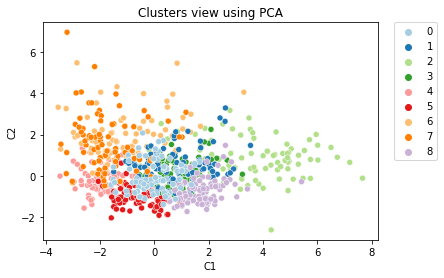

In [34]:
sns.scatterplot(x='C1', y='C2', hue='cluster', data=sampled_clusters_pca, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.show()

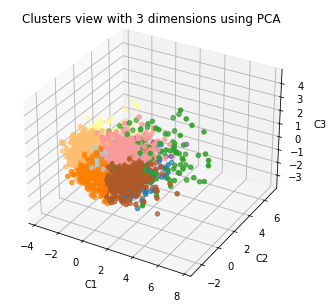

In [35]:
fig = plt.figure()
fig.suptitle('Clusters view with 3 dimensions using PCA')
ax = Axes3D(fig)

ax.scatter(df_pca['C1'], df_pca['C2'], df_pca['C3'],
           c=df_pca['cluster'], cmap='Paired')

ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_zlabel('C3')
plt.show()

In [89]:
#tsne = TSNE(n_components=2, perplexity=50, n_iter=5000, random_state=42, learning_rate=190)
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
songs_tsne = tsne.fit_transform(songs_scaled)
df_tsne = pd.DataFrame(songs_tsne, columns=['C1', 'C2'])
df_tsne['cluster'] = model.labels_
df_tsne.head()

,C1,C2,cluster
0,-5.826440,28.715046,4
1,22.807693,27.199884,4
2,-6.680626,11.182299,1
3,18.073597,18.999884,4
4,18.500214,29.582308,4


In [90]:
sampled_clusters_tsne = pd.DataFrame()

for c in df_tsne.cluster.unique():
    df_cluster_sampled_tsne = df_tsne[df_tsne.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_tsne = pd.concat([sampled_clusters_tsne,df_cluster_sampled_tsne], axis=0)
sampled_clusters_tsne.cluster.value_counts()

7    86
6    86
5    86
4    86
3    86
2    86
1    86
0    86
Name: cluster, dtype: int64

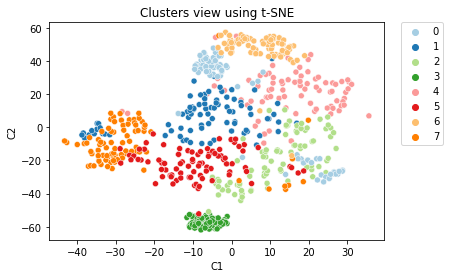

In [91]:
sns.scatterplot(x='C1', y='C2', hue='cluster', data=sampled_clusters_tsne, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using t-SNE')
plt.show()